<h1 align="center">
    <img alt="Animi Motus AI Logo" src="images\logo.png" width="400" height="400">
    <br />
    Den Loob - 01.01.1970
</h1>

<hr />

<div dir="rtl">
    <h2 align="center"><u>מטרת המחקר</u></h2>
    <div align="center">
    מטרת המחקר בשם Animi Motus* לעזור לאנשים עם הפרעות בזיהוי הבעות פנים. דוגמאות להפרעות כאלה הן 
    <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2737612/#b43">הפרעה דכאונית קשה</a>,
    <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2737612/#b32">סכיזופרניה</a>,
    ו<a href="https://doi.org/10.1016/j.psychres.2011.12.042">אישיות נרקיסיסטית</a>.
    </div>
</div>

\* משמעות של *"Animi Motus"* הינה *"רגשות"* בלטינית

<hr />

<div dir="rtl">
    <h2 align="center"><u>תיאור הנתונים</u></h2>

מאגר הנתונים ששומש במחקר זה נמצא באתר
<a href="https://www.kaggle.com/">kaggle</a>
תחת הקישור <a href="https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset">המצורף</a>. מאגר נתונים זה הוכן על ידי
<a href="https://jonathanoheix.github.io/">
Jonathan Oheix
</a>,
<a href="https://github.com/nakulsingh1289">
Nakul Singh
</a>
ו<a href="http://happyai.epizy.com/">Sagnik Roy</a>
וכולל סך הכל 28821 תמונות לאימון ו7066 תמונות לאימות.

</div>

<hr />
<h2 align="center"><u>חקר נתונים</u></h2>
<div dir="rtl">יבוא ספריות לחקר נתונים</div>

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<div dir="rtl">מציאת כמות תמונות בכל אחת מהתיקיות בעזרת לולאת for שמירתם בdataframe ובניית גרף עמודות לפי כמותם</div>

In [2]:

all_emotion_types = sorted(os.listdir("dataset/train/"))
epc = { # emotion_picture_count
    "type": [], # train or validation
    "emotion": [], # angry, sad, happy and etc
    "count": [], # int
    
}
# fill epc (emotion_picture_count) with `emotion_name: emotion_pictures_count`
for emotion_type in all_emotion_types:
    train_emotion_len = len(os.listdir("dataset/train/"+emotion_type))
    validation_emotion_len = len(os.listdir("dataset/validation/"+emotion_type))
    
    epc["type"].append("train")
    epc["emotion"].append(emotion_type)
    epc["count"].append(train_emotion_len)
    
    epc["type"].append("validation")
    epc["emotion"].append(emotion_type)
    epc["count"].append(validation_emotion_len)
    
emotion_count_df = pd.DataFrame(epc).sort_values("type")
emotion_count_df.reset_index(drop=True, inplace=True)
emotion_count_df

,type,emotion,count
0,train,angry,3993
1,train,disgust,436
2,train,fear,4103
3,train,happy,7164
4,train,neutral,4982
5,train,sad,4938
6,train,surprise,3205
7,validation,angry,960
8,validation,disgust,111
9,validation,fear,1018


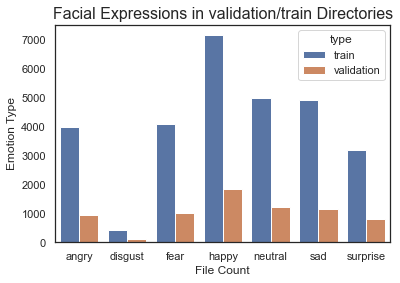

In [3]:
sns.set(style="white")
sns.barplot(x="emotion", y="count", hue="type", data=emotion_count_df)
plt.title("Facial Expressions in validation/train Directories", fontsize=16)
plt.xlabel("File Count")
plt.ylabel("Emotion Type")
plt.show()

<div dir="rtl">בעזרת ספריית random חישוב של path של 16 תמונות אקראיות מהתיקיית train והצגתם</div>

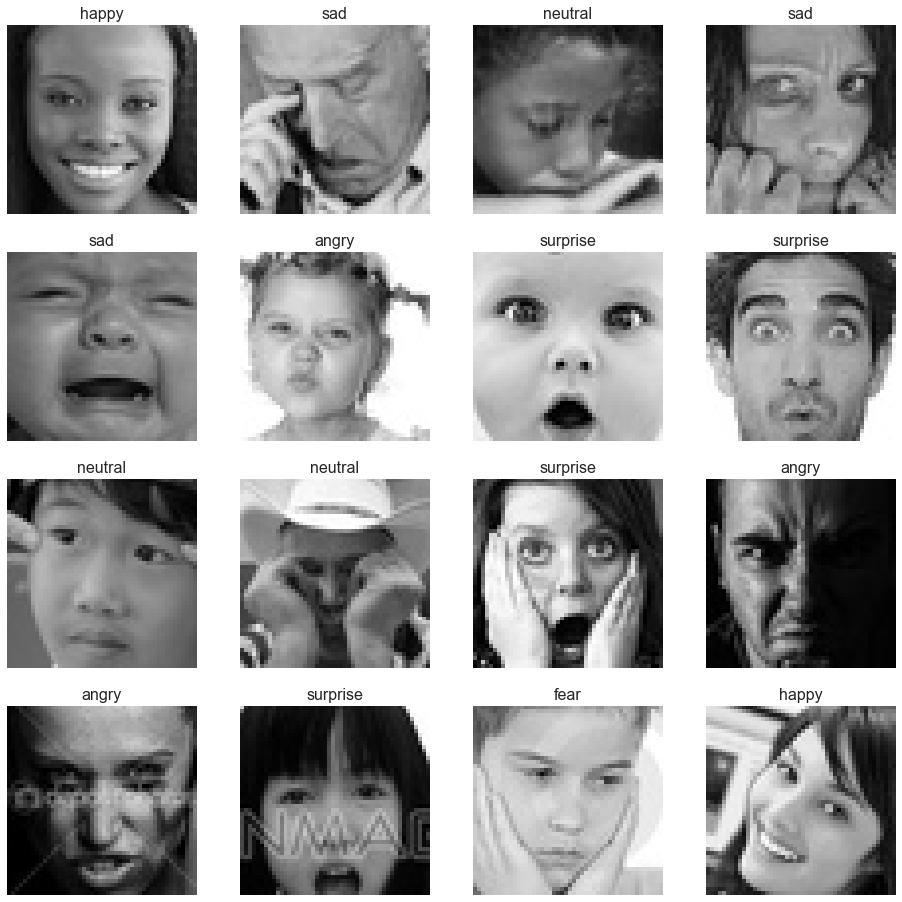

In [4]:
import random
get_random_child_file_path = lambda parent_path: os.path.join(parent_path, random.choice(os.listdir(parent_path)))

f, axarr = plt.subplots(4, 4, figsize=(16, 16))
r, c = 0, 0

for i in range(16):
    if (i % 4 == 0 and i != 0):
        r += 1
        c = 0
    emotion = get_random_child_file_path("dataset\\train\\")
    img = cv2.imread(get_random_child_file_path(emotion))
    axarr[r, c].imshow(img)
    axarr[r, c].set_title(os.path.basename(emotion), fontsize=16)
    axarr[r, c].axis('off')
    c += 1
plt.show()

<hr />
<h2 align="center"><u>למידת מכונה</u></h2>

<div dir="rtl">יבוא ספריות ללמידת מכונה</div>

In [5]:
import mediapipe as mp

<div dir="rtl">הצהרת פונקציות לזיהוי פנים וויזואליזציתם של הנקודות וחלקים של הפנים</div>

In [6]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
def find_face(image):
    with mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        min_detection_confidence=0.5) as face_mesh:
        
        results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    return results
def draw_landmarks(image, landmarks, FACEMESH_TESSELATION=True):
    if (FACEMESH_TESSELATION):
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=landmarks,
        connections=mp_face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
    return image

<div dir="rtl">מציאת תמונה אקראית והצגתה עם וללא ויזואליזציה של חלקים מהפנים</div>

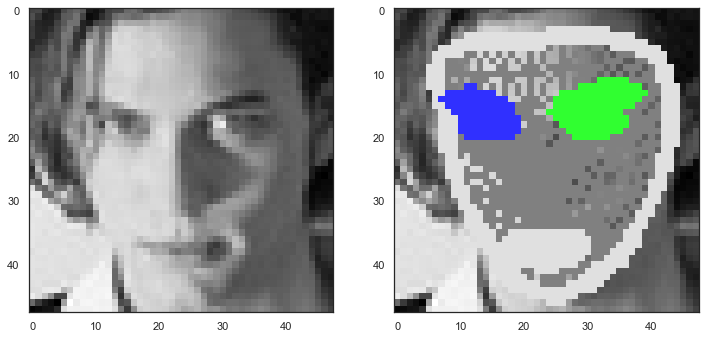

In [7]:
get_random_child_file_path = lambda parent_path: os.path.join(parent_path, random.choice(os.listdir(parent_path)))
path = get_random_child_file_path(get_random_child_file_path("dataset\\train\\"))
image = cv2.imread(path)
multi_face_landmarks = find_face(image).multi_face_landmarks
if not multi_face_landmarks:
    plt.imshow(image)
    raise Exception(f"no face found {path}")
face_landmarks = multi_face_landmarks[0]
annotated_image = image.copy()
draw_landmarks(annotated_image, face_landmarks)

      
_, axarr = plt.subplots(1, 2, figsize=(12, 12))
axarr[0].imshow(image)
axarr[1].imshow(annotated_image)
plt.show()

<div dir="rtl">הדפסת הנקודות שהוצגו לעיל כקואורדינטות על התמונה</div>

In [8]:
landmarks_dict = {
    "x": [],
    "y": [],
    "z": [],
}
for lm in face_landmarks.landmark:
    landmarks_dict['x'].append(lm.x)
    landmarks_dict['y'].append(lm.y)
    landmarks_dict['z'].append(lm.z)
pd.DataFrame(landmarks_dict)

,x,y,z
0,0.484037,0.770106,-0.025459
1,0.464824,0.699689,-0.152670
2,0.479584,0.703556,-0.055322
3,0.434718,0.569906,-0.147482
4,0.460568,0.671063,-0.174291
...,...,...,...
463,0.563901,0.402133,-0.061056
464,0.544676,0.420322,-0.073614
465,0.532322,0.437759,-0.090344
466,0.732621,0.360037,-0.073599


<h3 align="center"><u>Generating a CSV File of Landmarks</u></h3>

<div dir="rtl">יבוא ספריות לבניית קובץ csv אשר ישמש ללמידת מכונה</div>

In [9]:
import csv
from collections import deque

<div dir="rtl">בניית קובץ csv בעזרת לולאת for ופונקציות שהוגדרו לעיל, ושמירת התוצאות בקובץ.</div>

In [10]:
face_not_found_dict = {}
for data_usage_type in ['train', 'validation']:
    if os.path.exists(f"{data_usage_type}_landmarks.csv"):
        print(f"{data_usage_type}_landmarks.csv exists, continuing to the next data usage type...")
        continue
    face_not_found_dict[data_usage_type] = face_not_found = deque()
    with open(f'{data_usage_type}_landmarks.csv', 'w') as f:
        writer = csv.writer(f)
        
        header=['emotion']+["xyz"[i%3]+str(j) for i, j in zip(range(468*3), [k for k in range(468) for _ in range(3)])] # 468 rows * 3 columns
        # header looks like: [emotion, x0, y0, z0, x1, y1, ..., z467]
        
        writer.writerow(header)
        
        # for each emotion
        for e_i, e_type in enumerate(all_emotion_types):
            path = f"dataset/{data_usage_type}/{e_type}/"
            all_image_names = os.listdir(path)
            print(f"working on {data_usage_type}/{e_type}")
            # for each image of this emotion type
            for image_name in all_image_names:
                image_path = path+image_name
                image = cv2.imread(image_path)
                
                multi_face_landmarks = find_face(image).multi_face_landmarks
                # if no face found, add to list
                if not multi_face_landmarks:
                    face_not_found.append(image_path)
                    continue
                y = [i.y for i in multi_face_landmarks[0].landmark]
                x = [i.x for i in multi_face_landmarks[0].landmark]
                z = [i.z for i in multi_face_landmarks[0].landmark]
                
                data = np.array(list(zip(x, y, z))).reshape(-1)
                data = np.concatenate(([e_i],data))
                writer.writerow(data)
                
    print(f"Done {data_usage_type}. {len(face_not_found)=}")
print("Done")
            
        
        
        
    
    

train_landmarks.csv exists, continuing to the next data usage type...
validation_landmarks.csv exists, continuing to the next data usage type...
Done


<div dir="rtl">שמירת שמות של הקבצים עם פנים שלא זיוהתו.</div>

In [11]:
for data_usage_type in ["train", "validation"]:
    
    if data_usage_type not in face_not_found_dict:
        print(f"{data_usage_type} is not in face_not_found_dict, continuing to the next data usage type...")
        continue
    if os.path.exists(f"{data_usage_type}_no_face_found.csv"):
        print(f"{data_usage_type}_no_face_found.csv exists, continuing to the next data usage type...")
        continue
    
    with open(f"{data_usage_type}_no_face_found.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerow(face_not_found_dict[data_usage_type])
print("Done!")

train is not in face_not_found_dict, continuing to the next data usage type...
validation is not in face_not_found_dict, continuing to the next data usage type...
Done!


<div dir="rtl">טעינת הdataset והדפסה של חמש שורות הראשונות שלו</div>

In [12]:
train_df = pd.read_csv('train_landmarks.csv')
test_df = pd.read_csv('validation_landmarks.csv')

In [13]:
train_df.head()

,emotion,x0,y0,z0,x1,y1,z1,x2,y2,z2,...,z464,x465,y465,z465,x466,y466,z466,x467,y467,z467
0,0.0,0.531052,0.766528,-0.066078,0.590875,0.653876,-0.152624,0.539522,0.676948,-0.071534,...,0.019166,0.574877,0.426415,-0.009140,0.690913,0.378875,0.146359,0.702611,0.372493,0.153546
1,0.0,0.489051,0.754891,-0.103594,0.459130,0.616146,-0.195686,0.473762,0.653929,-0.107277,...,0.001024,0.510184,0.410119,-0.025311,0.705920,0.354981,0.023032,0.725784,0.337364,0.022208
2,0.0,0.513394,0.768508,-0.140086,0.520900,0.619091,-0.249280,0.518641,0.663883,-0.138140,...,0.009991,0.587300,0.424491,-0.025031,0.820161,0.407064,0.068830,0.841950,0.397191,0.070206
3,0.0,0.471052,0.694842,-0.110672,0.477409,0.570939,-0.185398,0.478078,0.607723,-0.098481,...,-0.000122,0.560386,0.398199,-0.024131,0.759891,0.375499,0.032051,0.781655,0.363766,0.031378
4,0.0,0.496296,0.749524,-0.041758,0.488255,0.687777,-0.176013,0.492631,0.700287,-0.075950,...,-0.064295,0.552662,0.455754,-0.083548,0.749166,0.400290,-0.037998,0.767254,0.384250,-0.039437


In [14]:
train_df_shuffled = train_df.sample(frac=1, random_state=2).reset_index(drop=True)

In [15]:
train_df_shuffled.head()

,emotion,x0,y0,z0,x1,y1,z1,x2,y2,z2,...,z464,x465,y465,z465,x466,y466,z466,x467,y467,z467
0,4.0,0.489441,0.711941,-0.096594,0.489756,0.584143,-0.189615,0.488439,0.617714,-0.094735,...,-0.008896,0.547053,0.391767,-0.033892,0.747708,0.339988,0.037498,0.764248,0.325001,0.037773
1,4.0,0.317125,0.617513,-0.085324,0.294409,0.500644,-0.151831,0.320752,0.537389,-0.081705,...,-0.021971,0.414336,0.352907,-0.037826,0.608463,0.329737,-0.046836,0.629946,0.312580,-0.051060
2,3.0,0.538518,0.730139,-0.118084,0.528252,0.599744,-0.182610,0.529903,0.643436,-0.108031,...,0.033898,0.559699,0.420041,0.009604,0.738222,0.385969,0.083974,0.753836,0.365897,0.087663
3,0.0,0.522812,0.712983,-0.101182,0.445895,0.615441,-0.156803,0.486442,0.637872,-0.087955,...,-0.006389,0.460952,0.416320,-0.023426,0.613079,0.300165,-0.029508,0.624538,0.277109,-0.033912
4,6.0,0.458839,0.585193,-0.075320,0.466144,0.488160,-0.155226,0.464272,0.512500,-0.077791,...,-0.010929,0.537147,0.278911,-0.028257,0.724682,0.242840,0.023866,0.745715,0.221871,0.025585


<div dir="rtl">חלוקת הנתונים לקלט ופלט רצוי</div>

In [16]:
X_train = train_df_shuffled.loc[:, train_df_shuffled.columns != 'emotion'].values
y_train = train_df_shuffled['emotion'].values

In [17]:
X_test = test_df.loc[:, test_df.columns != 'emotion'].values
y_test = test_df['emotion'].values

<h3 align="center"><u>Training The KNN model</u></h3>

<div dir="rtl">יבוא ספריות ללמידת מכונה</div>

In [18]:
from sklearn.neighbors import KNeighborsClassifier
import pickle

<div dir="rtl">אימון המודל עם היפרפרמטר k בטווח בין 1 ל-53</div>

In [19]:
k_neighbors_test_df = pd.DataFrame({"k": [], "accuracy": []})
min_k, max_k, step = 1, 53, 2
print("calculating...")
print("[", end="")
for k in range(min_k, max_k+step, step):
    test_knn = KNeighborsClassifier(n_neighbors=k)
    test_knn.fit(X_train, y_train)
    accuracy = test_knn.score(X_test, y_test)
    print("▮",end="")
    
    k_neighbors_test_df = k_neighbors_test_df.append(
        {"k": k, "accuracy": accuracy}, ignore_index=True
    )
print("]")
k_neighbors_test_df


calculating...
[▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮]


,k,accuracy
0,1.0,0.411819
1,3.0,0.377615
2,5.0,0.402199
3,7.0,0.401741
4,9.0,0.401741
5,11.0,0.403726
6,13.0,0.401741
7,15.0,0.411971
8,17.0,0.408459
9,19.0,0.411361


<div dir="rtl">ויזואליזציה של דיוק המודל עם היפרפרמטרים k שונים</div>

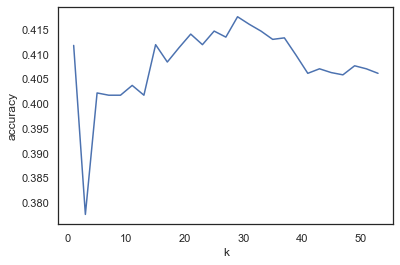

In [20]:
sns.lineplot(data=k_neighbors_test_df, x="k", y="accuracy")
plt.savefig("tmp.png")
plt.show()

In [21]:
best_row = k_neighbors_test_df.iloc[k_neighbors_test_df["accuracy"].idxmax()]
best_k = int(best_row["k"])
best_acc = best_row["accuracy"]
print(f"Best K found!\nk {best_k} with accuracy {round(best_acc*100,3)}%")

Best K found!
k 29 with accuracy 41.762%


In [22]:
KNN = None
if os.path.exists("animi_motus.knn.pickle"):
    with open("animi_motus.knn.pickle", "rb") as f:
        KNN = pickle.load(f)
else:
    KNN = KNeighborsClassifier(n_neighbors=best_k)
    KNN.fit(X_train, y_train)

<div dir="rtl">שמירת המודל בקובץ</div>

In [23]:
if not os.path.exists("animi_motus.knn.pickle"):
    with open("animi_motus.knn.pickle", "wb") as f:
        pickle.dump(KNN, f)

<h3 align="center"><u>Testing the KNN model</u></h3>

<div dir="rtl">יבוא ספריות לבדיקת המודל</div>

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

<div dir="rtl">חישוב הדיוק וויזואליזציה של בדיקת המודל</div>

In [25]:
print("Accuracy: ", KNN.score(X_test, y_test))

Accuracy:  0.41762101084134984


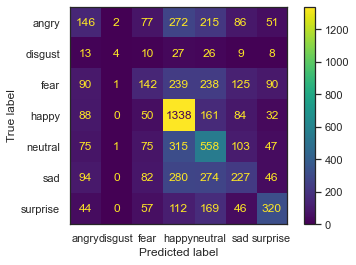

In [26]:
ConfusionMatrixDisplay.from_estimator(KNN, X_test, y_test, display_labels=all_emotion_types)
plt.show()

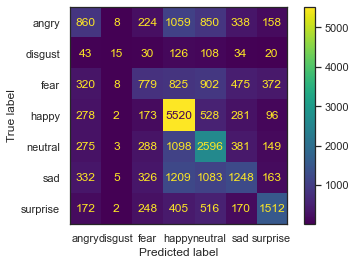

In [27]:
ConfusionMatrixDisplay.from_estimator(KNN, X_train, y_train, display_labels=all_emotion_types)
plt.show()

<div dir="rtl">כדי לבדוק האם המודל יעבוד גם עם תמונות בחיים האמיתיים, צילמתי ומצאתי באינטרנט כמה תמונות ובדקתי האם המודל יזהה את הבעות הפנים</div>

actual:angry, predicted:angry! The AI was right!


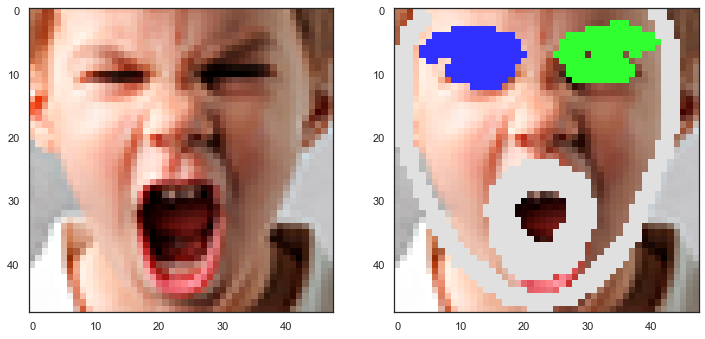

actual:angry, predicted:angry! The AI was right!


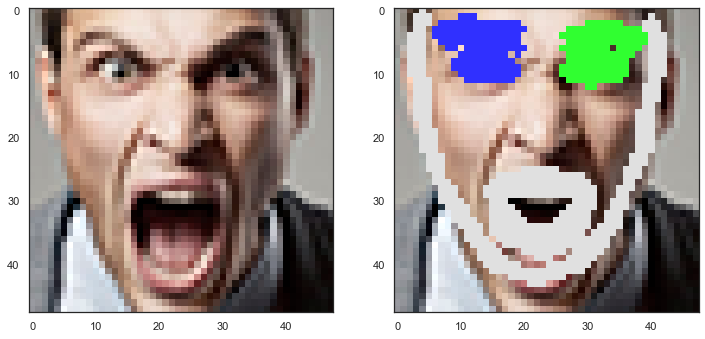

actual:fear, predicted:neutral :(   the AI was wrong.


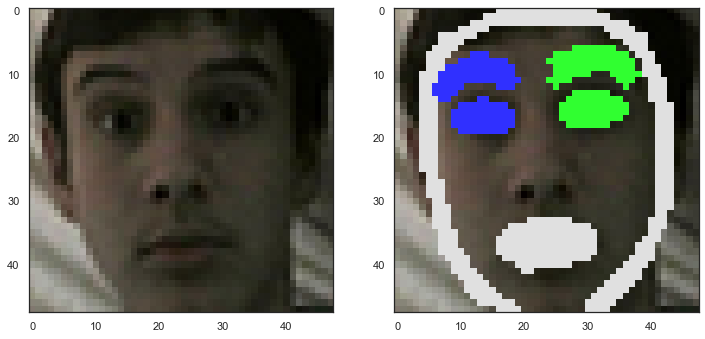

actual:fear, predicted:fear! The AI was right!


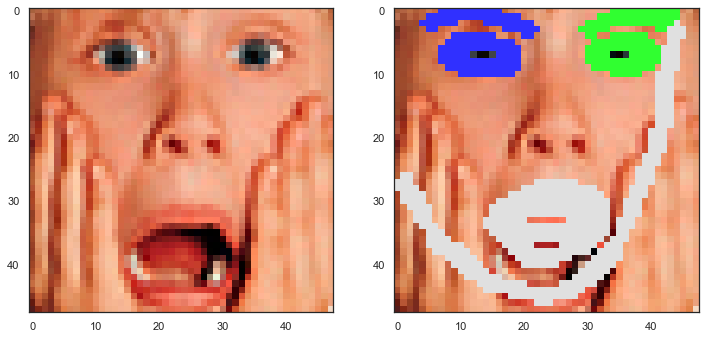

actual:happy, predicted:happy! The AI was right!


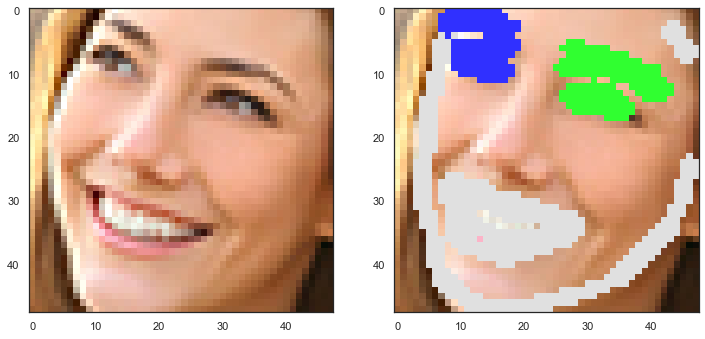

actual:happy, predicted:neutral :(   the AI was wrong.


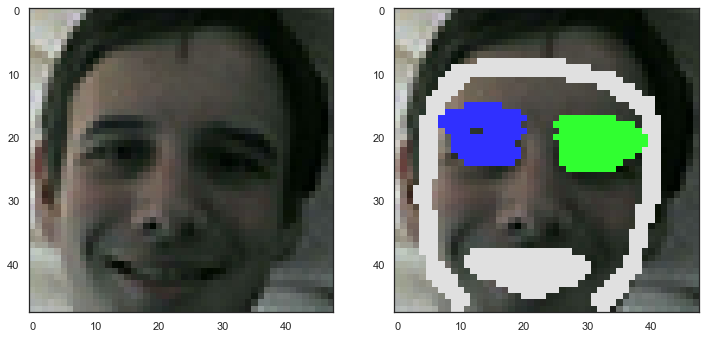

actual:neutral, predicted:neutral! The AI was right!


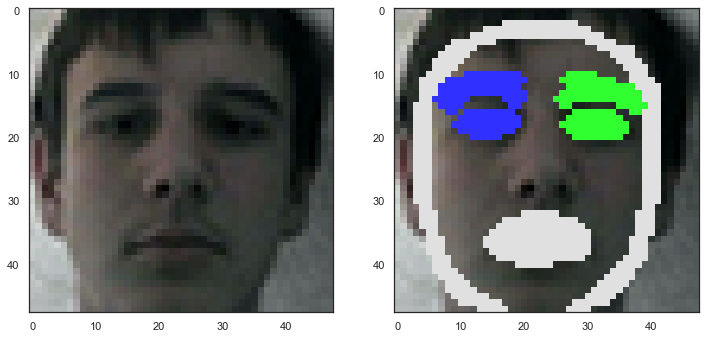

actual:sad, predicted:happy :(   the AI was wrong.


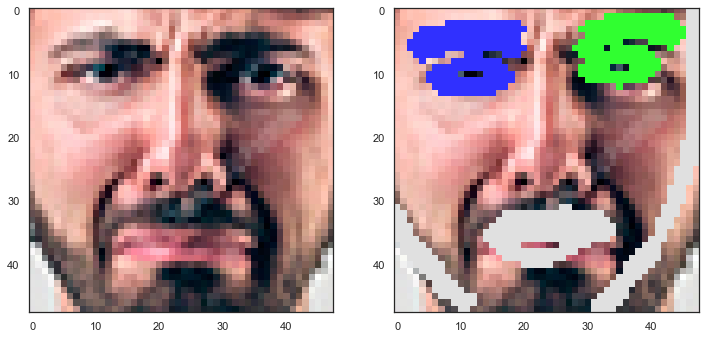

actual:surprise, predicted:surprise! The AI was right!


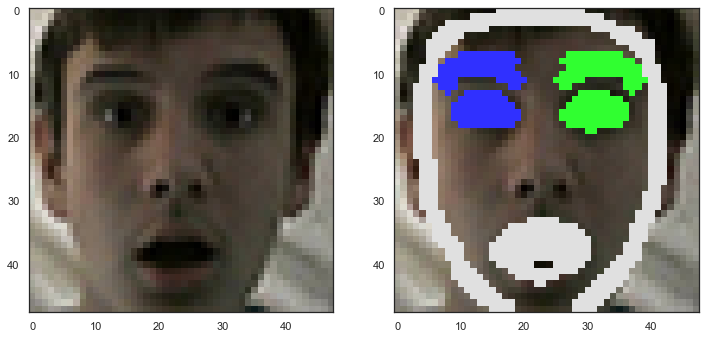

Predicted 6 out of 9 (0.67%)


In [64]:
irl_test = os.listdir("irl_test")


def predict(image):
    multi_face_landmarks = find_face(image).multi_face_landmarks
    if not multi_face_landmarks:
        return -1
    y = [i.y for i in multi_face_landmarks[0].landmark]
    x = [i.x for i in multi_face_landmarks[0].landmark]
    z = [i.z for i in multi_face_landmarks[0].landmark]

    X = np.array(list(zip(x, y, z))).reshape(-1)
    return all_emotion_types[int(KNN.predict([X])[0])], multi_face_landmarks[0]


total = 0
true_answers = 0
for emotion in os.listdir("irl_test"):
    files = os.listdir(f"irl_test/{emotion}")
    total += len(files)
    for file_name in files:
        image = cv2.imread(f"irl_test/{emotion}/{file_name}")
        predicted, landmarks = predict(image)
        true_answers += emotion == predicted
        print(
            f"actual:{emotion}, predicted:{predicted}"
            + (
                "! The AI was right!"
                if emotion == predicted
                else " :(   the AI was wrong."
            )
        )
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        annotated_image = image.copy()
        draw_landmarks(annotated_image, landmarks, FACEMESH_TESSELATION=False)
        _, axarr = plt.subplots(1, 2, figsize=(12, 12))
        axarr[0].imshow(image)
        axarr[1].imshow(annotated_image)
        plt.show()

print("=" * 20 + f"\nPredicted {true_answers} out of {total} ({true_answers/total:.2f}%)")


In [29]:
guess_acc = 1/len(all_emotion_types)
print(f"Guessing accuracy: {round(guess_acc*100, 3)}%")
print(f"KNN accuracy: {round(best_acc*100, 3)}%")
print(f"(KNN accuracy > Guessing accuracy): '{best_acc > guess_acc}'", end=" ")
print(f"by {round(best_acc/guess_acc, 1)}")

Guessing accuracy: 14.286%
KNN accuracy: 41.762%
(KNN accuracy > Guessing accuracy): 'True' by 2.9


<div dir="rtl">כמו שניתן לראות הבינה המלאכותית פי 3 יותר טובה מניחוש ולכן היא נחשבת למודל והבינה המלאכותית טובה, אך הייתי רוצה לקבל מספר דיוק קצת גבוה יותר לכן אני הולך לנסות מודלים אחרים</div>

<h3 align="center"><u>Neural Network</u></h3>

<div dir="rtl">נשתמש במודל CNN</div>

![CNN visual explanation](https://s3.amazonaws.com/hnrysprjcts/img/scene4.png)

<div dir="rtl"><a href="https://poloclub.github.io/cnn-explainer/">מצורף קישור</a> לאתר אשר מסביר בדרך מעולה איך CNN עובד</div>


In [30]:
import keras
import tensorflow as tf
from tensorflow import keras

<h3 align="center"><u>Preparing the Data For The CNN Neural Network</u></h3>

In [31]:
from keras.preprocessing.image import ImageDataGenerator
from collections import Counter
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications import ResNet50

In [32]:
# randomly transforms the data, like spin, mirror, crop etc to make it more diffrent
train_IDG  = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
test_IDG = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [33]:
# randomly transform the data, like spin, mirror, crop, shuffle and etc to make it more diffrent
train = train_IDG.flow_from_directory("dataset/train",
                                              target_size = (48,48),
                                              color_mode = "rgb",
                                              batch_size=128,
                                              class_mode='categorical',
                                              shuffle=True)


test = test_IDG.flow_from_directory("dataset/validation",
                                              target_size = (48,48),
                                              color_mode = "rgb",
                                              batch_size=128,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [34]:
counter = Counter(train.classes)
class_weights = {i:float(max(counter.values()))/img_count for i, img_count in counter.items()}
class_weights


{0: 1.7941397445529677,
 1: 16.431192660550458,
 2: 1.7460394833048989,
 3: 1.0,
 4: 1.4379767161782417,
 5: 1.4507897934386391,
 6: 2.235257410296412}

<h3 align="center"><u>Training The CNN model</u></h3>

In [35]:
model = Sequential()
model.add(ResNet50(input_shape=(48, 48, 3), weights='imagenet', include_top=False)) # resnet50 cnn model
model.add(GlobalMaxPooling2D()) # pool the image to reduce it's size
model.add(Dropout(0.5)) # drop random 50% of neurons
model.add(Dense(7,activation='softmax')) # layer of all conected neurons
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy']) # compiles with adam

In [36]:
if not os.path.exists("CNN/ai.nn"):
    fitting = model.fit(
        train,
        validation_data=test,
        class_weight=class_weights,
        epochs=25,
        steps_per_epoch=train.n//train.batch_size,
        validation_steps=test.n//test.batch_size
    )
    model.save("CNN/ai.nn")
    if not os.path.exists("CNN/fitting.pickle"):
        with open("CNN/fitting.pickle", "wb") as f:
            pickle.dump(fitting, f)
else:
    model = keras.models.load_model("CNN/ai.nn")
    if os.path.exists("CNN/fitting.pickle"):
        with open("CNN/fitting.pickle", "rb") as f:
            fitting = pickle.load(f)

Epoch 1/25
225/225 [==============================] - 619s 3s/step - loss: 1.1044 - accuracy: 0.2308 - val_loss: 0.5348 - val_accuracy: 0.3393
Epoch 2/25
225/225 [==============================] - 28s 123ms/step - loss: 0.7160 - accuracy: 0.3882 - val_loss: 0.5441 - val_accuracy: 0.4332
Epoch 3/25
225/225 [==============================] - 27s 119ms/step - loss: 0.5710 - accuracy: 0.5011 - val_loss: 0.3703 - val_accuracy: 0.5001
Epoch 4/25
225/225 [==============================] - 27s 119ms/step - loss: 0.4726 - accuracy: 0.5874 - val_loss: 0.3966 - val_accuracy: 0.5445
Epoch 5/25
225/225 [==============================] - 27s 119ms/step - loss: 0.3948 - accuracy: 0.6662 - val_loss: 0.3543 - val_accuracy: 0.5594
Epoch 6/25
225/225 [==============================] - 27s 119ms/step - loss: 0.3162 - accuracy: 0.7367 - val_loss: 0.3510 - val_accuracy: 0.5625
Epoch 7/25
225/225 [==============================] - 27s 119ms/step - loss: 0.2472 - accuracy: 0.8040 - val_loss: 0.3217 - val_accu

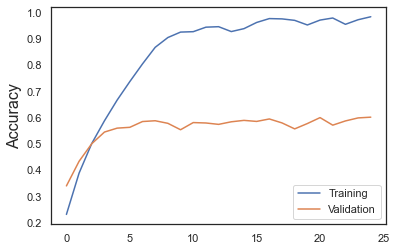

In [37]:
plt.ylabel('Accuracy', fontsize=16)
plt.plot(fitting.history['accuracy'], label='Training')
plt.plot(fitting.history['val_accuracy'], label='Validation')
plt.legend(loc='lower right')
plt.show()

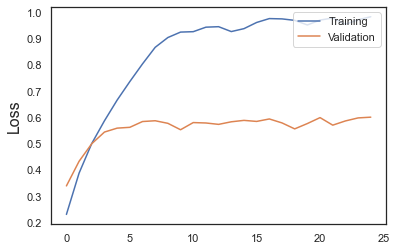

In [38]:
plt.ylabel('Loss', fontsize=16)
plt.plot(fitting.history['loss'], label='Training')
plt.plot(fitting.history['val_accuracy'], label='Validation')
plt.legend(loc='upper right')
plt.show()

<h3 align="center"><u>Testing the CNN model</u></h3>

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [65]:
accuracy = model.evaluate(test)[1]
print(f"accuracy: {(accuracy)*100:.3f}%")

56/56 [==============================] - 4s 67ms/step - loss: 0.5618 - accuracy: 0.6018
accuracy: 60.175%


In [41]:
predictions = [np.argmax(p) for p in model.predict(test)]

56/56 [==============================] - 4s 53ms/step


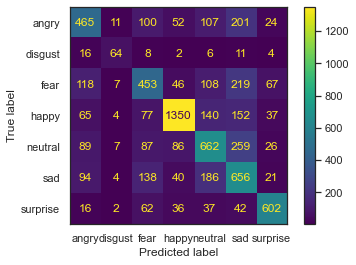

In [42]:
confusion_mat = confusion_matrix(test.classes, predictions)
ConfusionMatrixDisplay(confusion_mat, display_labels=all_emotion_types).plot()
plt.show()


In [66]:
guess_acc = 1/len(all_emotion_types)
print(f"Guessing accuracy: {round(guess_acc*100, 3)}%")
print(f"CNN accuracy: {round(accuracy*100, 3)}%")
print(f"(CNN accuracy > Guessing accuracy): '{accuracy > guess_acc}'", end=" ")
print(f"by {round(accuracy/guess_acc, 1)}")

Guessing accuracy: 14.286%
CNN accuracy: 60.175%
(CNN accuracy > Guessing accuracy): 'True' by 4.2


<hr />
<h2 align="center"><u>סיכום</u></h2>

<div dir="rtl">
    בהתחלה הנתונים שמצאתי היו נתונים גולמיים (raw data), חסרי משמעות ולא היה ניתן להשתמש בהם ללמידת מכונה זו ולכן העברתי אותם לקובץ csv מאיפה היה עכשיו אפשר לטעון אותם לdata frame ולהשתמש בהם באלגוריתם שכן קרוב.
    <br />
    בעזרת אלגוריתם שכן קרוב בניתי את הוקטורים של נקודות הציון של כל אחד מהפנים המעובדים בתוך הdata frame, אך כדאי לדעת באיזה כמות שכנים להשתמש (k) הייתי צריך למצוא מהו הk שכנים עם דיוק הטוב ביותר לכן בניתי לולאת for אשר בודקת את כל האפשרויות בטווח מ-1 עד 55 וגיליתי שבמקרה הזה k הטוב ביותר, כלומר, k עם דיוק הגבוה ביותר הוא 29.
    <br />
    בסוף, בדקתי את המודל שיצרתי והוא סיווג נכון יותר מ 41 אחוז מהבעות פנים של בני אדם שבחיים לא "ראה" אותם ובנוסף לכך, גם זיהה את הבעות פנים את רוב התמונות שצילמתי או מצאתי באינטרנט.
    <br />
    תוצאות המודל היו מאוד טובות ויפות והיו גדולים פי 3 מניחוש תשובה אבל רציתי לקבל מספר דיוק עוד יותר גבוה לכן החלטתי להשתמש במודל רשת קונבולוציה.
    <br />
    בהתחלה הכנתי את התמונות בעזרת ImageDataGenerator כדי שהמודל רשת קונבולוציה יוכל לעבוד איתם. לאחר מכן לימדתי ובדקתי את המודל וקיבלתי דיוק פי ארבע גדול מ ניחוש - 60 אחוז דיוק על תמונות בתיקיית הבדיקה.
    <br />
    תוצאות מחקר זה מראים שניתן להכין מודל לזיהוי הבעות פנים כך שיהיה נכון ברוב המקרים ויוכל לעזור לאנשים עם מחלות הקשורות לזיהוי הבעות פנים.
</div>

<hr />
<h2 align="center"><u>רפלקציה</u></h2>

<div dir="rtl">
    נהניתי מהפרויקט ומהמחקר הזה מכיוון שהנושא מאוד מעניין אותי והיה מאוד כיף ומהנה ללמוד עוד על ענף הטכנולוגי הזה. 
    <br />
    למדתי יותר על גרפים, KNN, פונקציות לוגריתמיות ואפילו על מחלות והפרעות כמו סכיזופרניה ואישיות נרקיסיסטית.
    <br />
    גיליתי שאלגוריתם שכן קרוב (KNN) עובד על ידי שמירה של וקטורים בזמן הלמידה ואז מציאה של שכנים של וקטורים הקרובים ביותר לנקודה שאותה אנו מנסים לסווג, לפי מספר שכנים קבוע שבחרנו
    ושמודל רשת קונבולוציה (CNN) עובד על ידי זכירה של חלקים (features) מהמידע ללימוד ואז מציעיתם במידע החדש/בדיקה
    הבנתי לעומק איך לסדר לבנות ולהשתמש בקבצים csv ולשלוט עליהם בעזרת ספריה pandas.
    הבנתי מה עוברים אנשים עם הפרעות כמו סכיזופרניה ונרקיסיסטיות, באיזה בעיות נתקלים ביום יום ואיך מזהים הבעות פנים.
    למדתי איך לחקור ולבדוק את המודל בעזרת נוסחאות וטבלאות כמו Confusion matrix, true ו-false positives ו-negatives, accuracy, precision, recall ו-F1 ואיך לחשב אותם.
    <br>
    אני מאוד שמח שבחרתי בנושא הזה ומקווה מאוד שהפרויקט שלי יעזור לאנשים עם הפרעות שהוזכרו לעיל.
    
</div>